#### Ejercicio 1

Implementar una función que, dada la frecuencia de muestreo y una 
cantidad de muestras, devuelva la duración en el tiempo de una señal 
con dichas características.

##### Solución:

En principio definiremos la representación de una muestra de una señal como 
una terna compuesta de un vector de muestras, un real que exprese su 
frecuencia de muestreo y otro real que indique el tiempo de inicio de la señal:

$$
    ([x_1, x_2, ..., x_n], F, t_0) \quad 
    \text{con} \quad x_i, F, t_0 \in \mathbb{R} \quad
    \text{y} \quad F > 0
$$

Donde las $x_i$ representarán la amplitud muestreada de la señal en un 
instante dado, todas en la misma unidad de amplitud, $F$ será la frecuencia de 
muestreo expresada en hercios y $t_0$ será el instante inicial de la 
señal expresado en segundos con respecto a un mismo marco temporal para
todas nuestras señales.

Para una mejor reutilización del código en futuros trabajos, crearemos
un módulo llamado `practica1` que contendrá todas las funciones que
definiremos. El código fuente de las mismas será presentado mediante 
la función `code()` de nuestro módulo `auxnb`, que se lista en el Anexo.

In [1]:
from practica1 import *
from auxnb import code

Así es como definimos entonces nuestra función `duration()` que nos 
devolverá la duración en el tiempo expresada en segundos de una señal 
a partir de su representación:

In [2]:
code(duration)

```python
def duration(signal):
    return (len(signal[0]) - 1) / signal[1]

```

Verifiquemos su utilización con un pequeño ejemplo (definimos nuestra
señal primero como una variable simbólica previendo que en el 
futuro podamos muestrear una señal real):

In [3]:
s1 = ([1, 2, 6, 3, -2, -1, 8, 2, 1], 50, 0)
duration(s1)

0.16

#### Ejercicio 2

Implementar una función que calcule el valor medio de una señal.

##### Solución

Tomaremos como definición de valor medio de nuestra señal discretizada
a sus muestras como:

$$
    \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

De manera que definimos nuestra función `med()` como:

In [4]:
code(med)

```python
def med(signal):
    return sum(signal[0]) / len(signal[0])

```

Verificamos su utilización con la misma señal del ejercicio anterior:

In [5]:
med(s1)

2.2222222222222223

#### Ejercicio 3

Implementar una función que construya la señal escalón $u[t]$ con 5 segundos de duración y una
frecuencia de muestreo $F = 5$, y la grafique en el intervalo $(−2,5;2,5)$.

##### Solución

La función escalón de Heaviside está definida matemáticamente (tomando su imagen en cero igual
a 1 para hacerla semicontínua superior) como:

$$
    H(t) = \left\{ 
               \begin{matrix} 
                   1 & t \ge 0 \\
                   0 & t  <  0 
               \end{matrix}
           \right.
$$

La implementamos mediante la función que llamamos `heavi()` y 
cuyo código fuente es:

In [6]:
code(heavi)

```python
def heavi(t):
    return 1 if (t >= 0) else 0

```

Implementamos también una función genérica llamada `sample()` que nos 
devuelva el muestreo de otra función cualquiera con respecto del tiempo, 
en una frecuencia de muestreo determinada y a partir de un tiempo 
definido de inicio:

In [7]:
code(sample)

```python
def sample(func, frec, init, dur):
    return (
        [func((init + (t / frec))) for t in range((int((frec * dur)) + 1))],
        frec,
        init,
    )

```

Generamos entonces la señal con los parámetros especificados por el enunciado del ejercicio:

In [9]:
escalon1 = sample(heavi, 5, -2.5, 5)

Por último, con la asistencia de la librería `matplotlib` diseñamos una 
función auxiliar `graph()` que se 
lista en el Anexo y que nos permite presentar los valores de una señal 
en un intervalo de tiempo dado. En nuestro ejercicio, su invocación 
toma la forma:

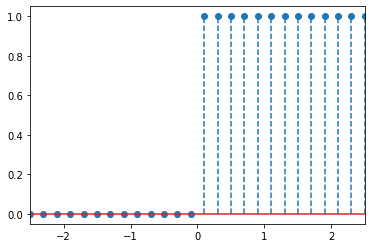

In [10]:
graph(escalon1, (-2.5, 2.5))

#### Ejercicio 4

Graficar la señal anterior en el intervalo $(−1;1)$

#### Solución

Reutilizando la señal del ejercicio anterior volvemos a graficar:

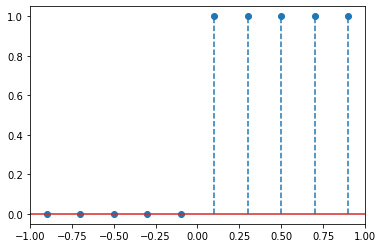

In [11]:
graph(escalon1, (-1, 1))